#### The first project will be the hello world of machine learning using builtin Iris Datasets. 

Python and jupyter notebook will be used. The datasets used is the iris data, an introductory dataset for Machine Learning begners.

Consice explanation of Iris Dataset

Iris flower is divided into 3 species:

    I.setosa
    I.versicolor
    I.virginica

The iris dataset consists of 4 features:

    Sepal Length
    Sepal Width
    Petal Length
    Petal Width

The objective of this project is to predict the species given the four features of an iris flower. Therefore, this is the classification problem. The algorithims which will be used are: Decision Tree, Logistic Regression, Support Vector Machine and Random Forest algorithms.

In [56]:
from IPython.display import Image
Image(url='https://www.tensorflow.org/images/iris_three_species.jpg')

#### Importing libraries

Libraries which will be used are:-

Pandas for loading datasets

matplotlib.pyplot for ploting

seaborn for visualization

numpy for mathematical calculation

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### Loading datasets

Inbuilt datasets from sklearn will be used

In [4]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [6]:
iris = sns.load_dataset('iris')

#### Simple Exploratory Data Analysis (EDA)

In [57]:
print(iris)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [7]:
#showing the first five columns
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
#showing the last five columns
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [9]:
# How many rows and columns
iris.shape

(150, 5)

In [11]:
#rows, columns and datatype
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
# Descriptive statistics summary
iris.describe().round(2)

,sepal_length,sepal_width,petal_length,petal_width
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [15]:
#Check columns names of dataset.
iris.keys()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [16]:
# Let's count example of each species in dataset. 
iris['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [13]:
# Check for null values
iris.isnull().values.any()

False

In [14]:
# count of nulls
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

#### Simple Data Visualisation

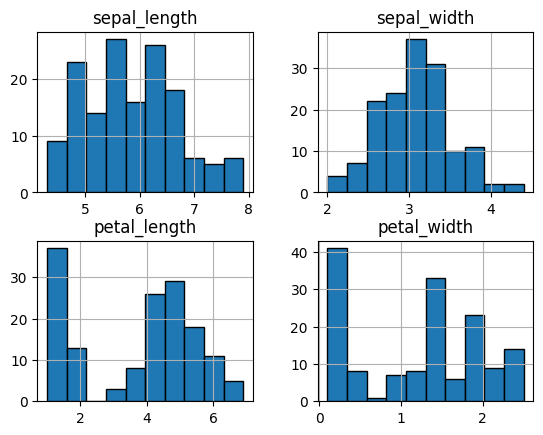

In [23]:
#Now, let's plot histagrams on iris features.
iris.hist(edgecolor='black', linewidth=1)
plt.show()

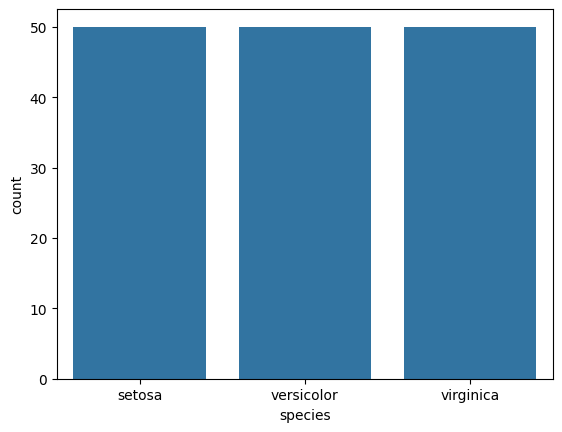

In [32]:
sns.countplot(x='species', data=iris)
plt.show()

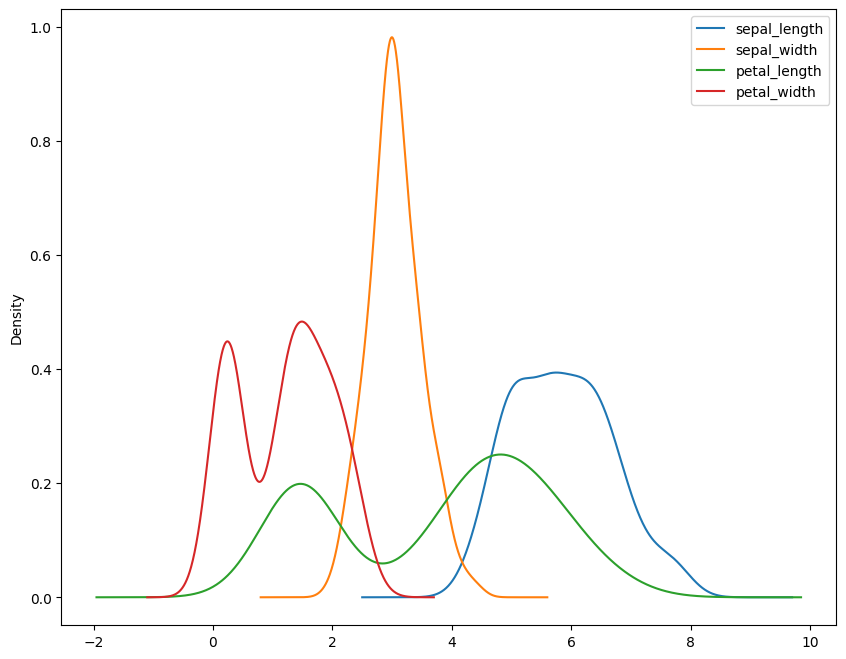

In [27]:
iris.plot(kind = "density", figsize=(10,8))
plt.show()

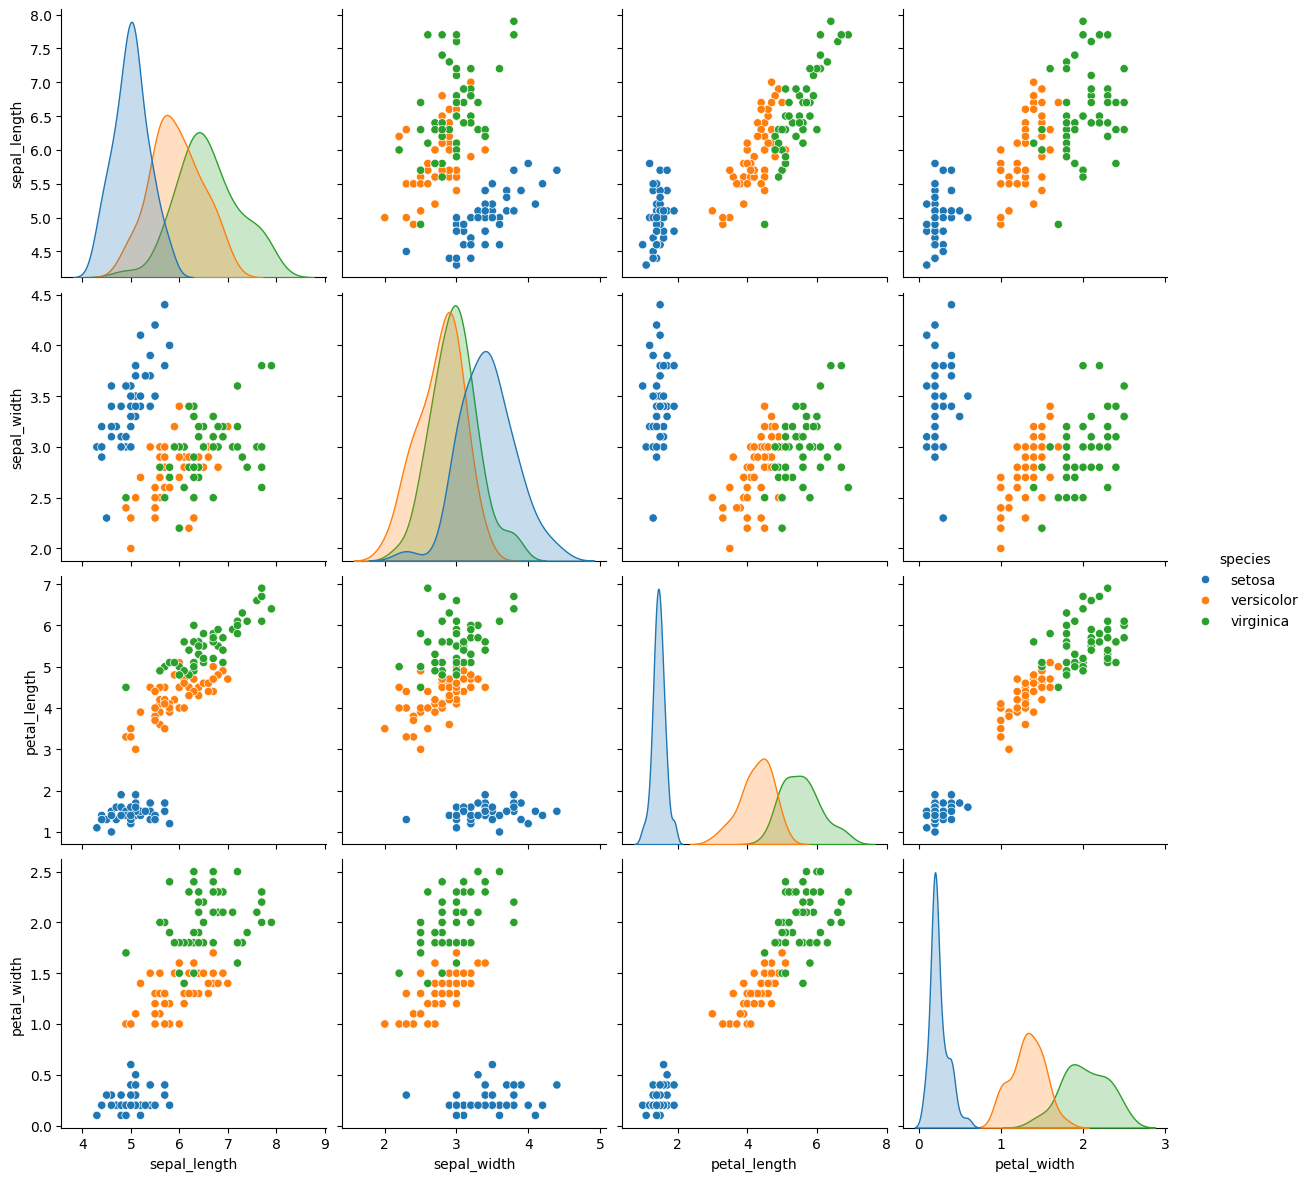

In [29]:
sns.pairplot(data = iris, hue = 'species', size = 3)

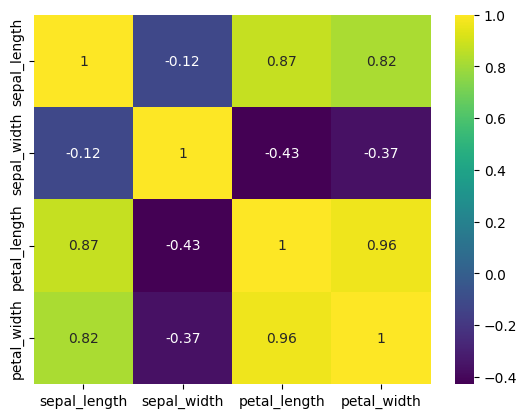

In [34]:
df = iris.drop(['species'], axis=1)
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.show()

Thus, the correlation of a variable with itself is always 1, hence the diagonals are also 1. By examining the heatmap, we can observe that there is a strong correlation between the length and width of the Petal, and likewise between the length and width of the Sepal.


### Machine Learning in Iris Data

Now, we are arrived to the interesting part. Building the Machine Learning model
We will split the data into training and test datasets for building Machine Learning classifier!
Steps on creating a model

    Get Data
    Prepare Data
    Define features
    Choose and appply a machine learning algorithm
    Predict on test data
    Score the model



In [35]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [41]:
#Defining independent (X) and dependent (y) variables
X = iris.drop(['species'], axis=True)
y = iris.filter(['species'])

In [58]:
#spliting the training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [59]:
#Check shape of train and test dataset
print('There are {} samples in the training set and {} samples in the test set'.format(X_train.shape[0],X_test.shape[0]))

There are 105 samples in the training set and 45 samples in the test set


In [60]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
42,4.4,3.2,1.3,0.2
56,6.3,3.3,4.7,1.6
55,5.7,2.8,4.5,1.3
118,7.7,2.6,6.9,2.3
21,5.1,3.7,1.5,0.4


In [61]:
y_train.head()

,species
42,setosa
56,versicolor
55,versicolor
118,virginica
21,setosa


Standardizing and Scaling the features

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print('Standardized features\n')
print(str(X_train[:4]))

Standardized features

[[-1.68118664  0.25563283 -1.32951546 -1.25816921]
 [ 0.50096518  0.49744766  0.5398702   0.52879575]
 [-0.18813539 -0.71162651  0.42990634  0.14587469]
 [ 2.10886652 -1.19525618  1.74947268  1.42227824]]


#### Choosing and applying Algorithms, Predicting and Scoring

In this part we will apply Decision Tree, SVM and logistic regression algorithms.

Decision Tree classifier

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#Instantiate the model
model = DecisionTreeClassifier()

#Fitting the model
model.fit(X_train, y_train)

#Predict on test data
y_pred = model.predict(X_test)

#Evaluate accuracy
print('The accuracy of the Decision Tree is', accuracy_score(y_pred, y_test))

The accuracy of the Decision Tree is 0.9111111111111111


Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('The accuracy of the Logistic Regression is', accuracy_score(y_pred, y_test))

The accuracy of the Logistic Regression is 0.9333333333333333


Support Vector Machines

In [65]:
from sklearn.svm import LinearSVC

model = LinearSVC(C=10)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('The accuracy of the Support Vector Machine is', accuracy_score(y_pred, y_test))

The accuracy of the Support Vector Machine is 0.9111111111111111


Random Forests (n Decision trees)

In [66]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=2)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('The accuracy of the Random Forest is', accuracy_score(y_pred, y_test))

The accuracy of the Random Forest is 0.9111111111111111
